# Logistic Regression

### Step 1 - Data preprocessing

In [28]:
#importing libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [29]:
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
orig_dataset=dataset #saving the original dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
# Removing User ID column
dataset = dataset.drop(columns=['User ID'])

In [31]:
# Creating dummy variables
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [46]:
#Spliting
from sklearn.model_selection import train_test_split
y_col=['Purchased']
y=dataset[y_col]
X=dataset.drop(columns=y_col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


### Step 2 - Feature scaling

In [47]:
from sklearn import preprocessing
std_cols = ['Age', 'EstimatedSalary']
std_scal=preprocessing.StandardScaler()
X_train.loc[:,std_cols]=std_scal.fit_transform(X_train[std_cols])
X_test.loc[:,std_cols]=std_scal.fit_transform(X_test[std_cols])

### Step 3 - Logistic Regression Model

In [48]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\diogo_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Step 4 - Predict

In [49]:
y_pred = model.predict(X_test)

### Step 5 - Evaluate Predictions

In [50]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
model.score(X_test, y_test)

0.775

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

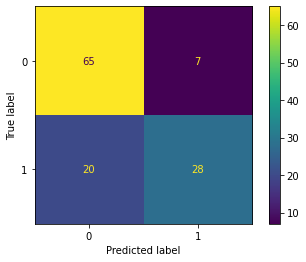

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_viz=ConfusionMatrixDisplay(cm).plot()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        72
           1       0.80      0.58      0.67        48

    accuracy                           0.78       120
   macro avg       0.78      0.74      0.75       120
weighted avg       0.78      0.78      0.77       120

